<a href="https://colab.research.google.com/github/dariakrtn/AI_2022/blob/main/hw_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 1: На занятии мы разбирали, как осуществить поворот изображения с помощью матрицы поворота.
Однако мы с вами заметили, что поворот происходит относительно нуля координат,
что может приводить не совсем к тому результату, который мы ожидаем получить.
Задача состоит в том, чтобы повернуть изображение относительно его центра (а не начала координат).

Подсказка: вспомните идею решения, которую мы обсуждали на занятии - необходимо сделать перенос
центра изображения в начало СК, затем осуществить поворот, а затем перенести обратно в центр.
Дополнительный вопрос: можем ли мы эти три преобразования соединить в одно? Другими словами,
построить композицию преобразований в виде единой матрицы? Как это сделать?
Для проведения экспериментов используйте изображение messi5.jpg


In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, pi

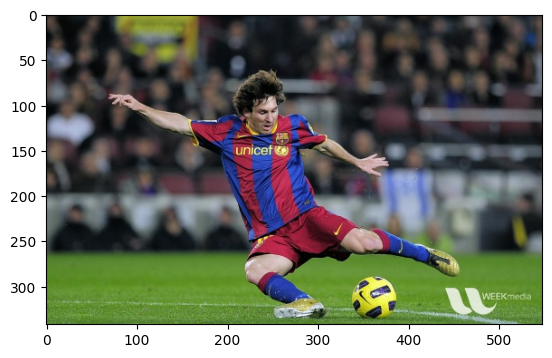

In [14]:
img = cv.imread("messi5.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
height, width = img.shape[:2]

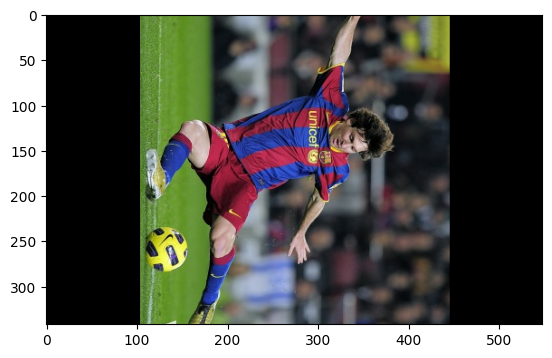

In [15]:
# За одно преобразование:
angle = 90 * pi / 180
img = cv.imread("messi5.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


#сдвиг начала координат
height, width = img.shape[:2]
tx = width // 2
ty = height // 2

#поворот изображения
M = np.float32([
    [cos(angle) , -sin(angle), tx - cos(angle) * tx + sin(angle) * ty],
    [sin(angle), cos(angle), ty - sin(angle) * tx - cos(angle) * ty]])

img_res = cv.warpAffine(img, M, (width, height))
plt.imshow(img_res)


Задание 2: В папке находятся изображения (все кроме messi5.jpg),
которые были подвернуты различным деформациям.
Используя аффинные преобразования, необходимо "выправить" эти изображения
(привести в исходный вид).


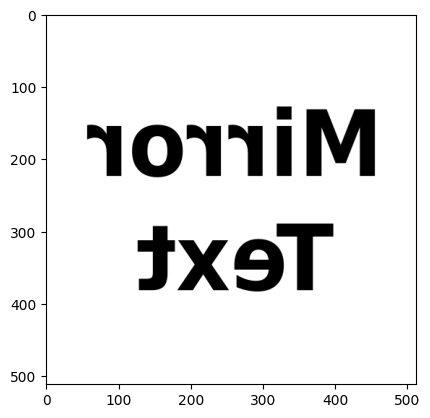

In [138]:
img = cv.imread("text.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

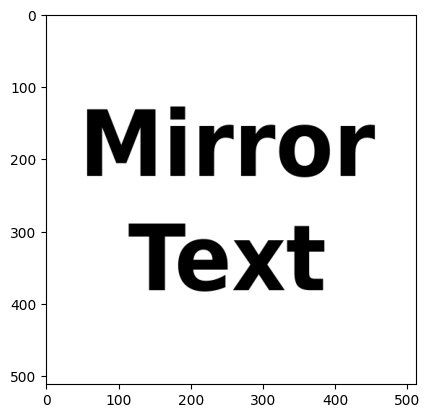

In [140]:
res = cv.flip(img, 1)
plt.imshow(res)

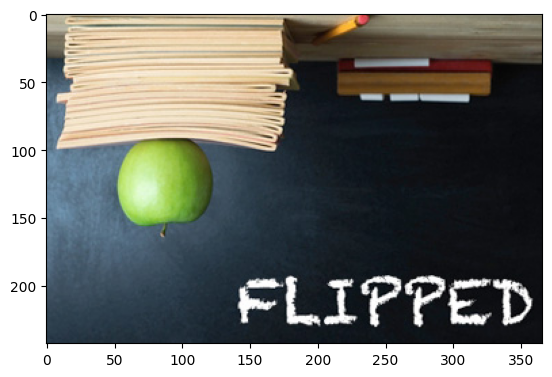

In [141]:
img = cv.imread("apple.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

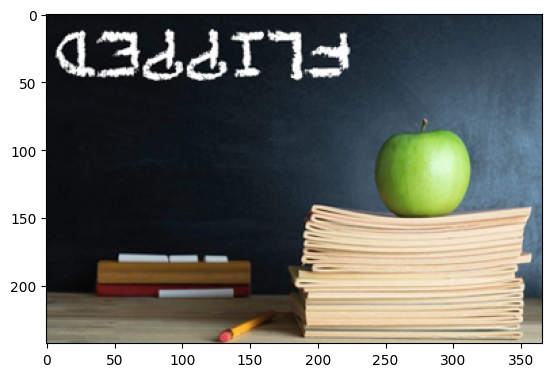

In [143]:
res1 = cv.flip(img, 0)
res = cv.flip(res1, 1)
plt.imshow(res)

(1110, 1626, 3)

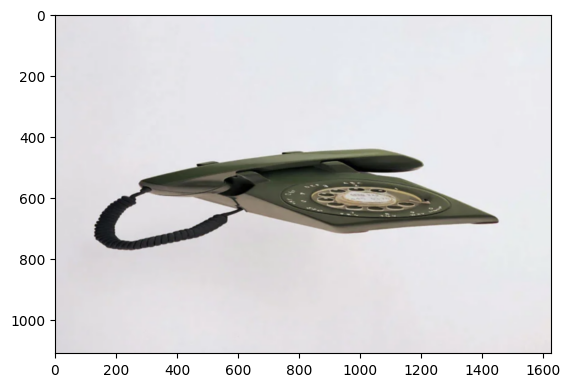

In [144]:
img = cv.imread("phone.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

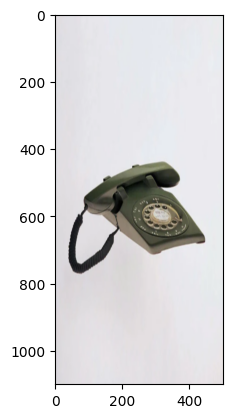

In [147]:
pts1 = np.float32([[0, 0], [1626, 0],
                       [0, 1110], [1626, 1110]])
pts2 = np.float32([[0, 0], [500, 0],
                       [0, 1110], [500, 1100]])

# Применила алгоритм перспективного преобразования
matrix = cv.getPerspectiveTransform(pts1, pts2)
result = cv.warpPerspective(img, matrix, (500, 1100))

plt.imshow(result)

(1100, 1618, 3)

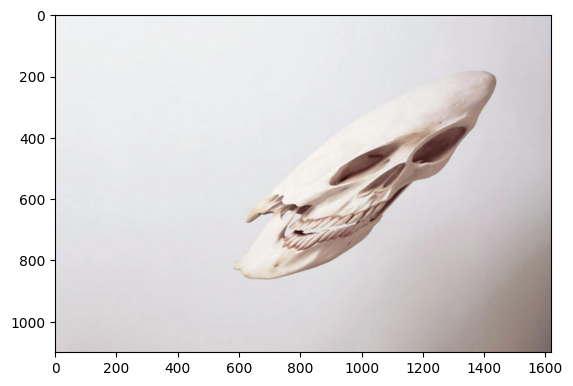

In [60]:
img = cv.imread("skull.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

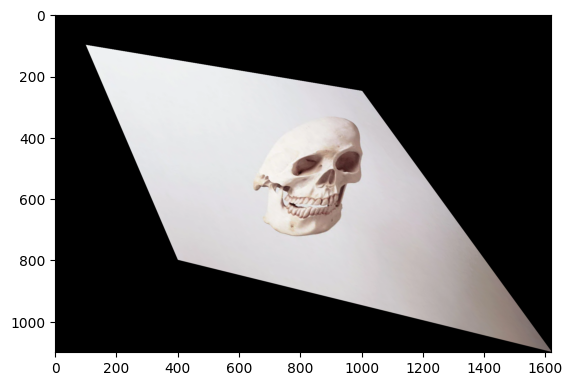

In [134]:
pts1 = np.float32([[0, 0], [1618, 0],
                       [0, 1100], [1618, 1100]])
pts2 = np.float32([[100, 100], [1000, 250],
                       [400, 800], [1618, 1100]])

# Применила алгоритм перспективного преобразования
matrix = cv.getPerspectiveTransform(pts1, pts2)
result = cv.warpPerspective(img, matrix, (1618, 1100))

plt.imshow(result)